<a href="https://colab.research.google.com/github/linasdias/recobjetos.py/blob/main/Codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando bibliotecas, carregando modelo pré-treinado e montando pastas do drive

In [ ]:
# Bibliotecas
import cv2
import os
import math
from google.colab import drive
import numpy as np
import tensorflow as tf

# Modelos de deep learning do Keras
# Originais
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.applications.mobilenet_v3 import MobileNetV3Small, MobileNetV3Large
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet import ResNet50, ResNet101, ResNet152
from keras.applications.xception import Xception
from keras.applications.densenet import DenseNet169, DenseNet201
# Adicionados pela aluna
from keras.applications.resnet_v2 import ResNet50V2, ResNet101V2, ResNet152V2
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.nasnet import NASNetMobile, NASNetLarge
from keras.applications.efficientnet import EfficientNet, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, EfficientNetB5, EfficientNetB6, EfficientNetB7
from keras.applications.efficientnet_v2 import EfficientNetV2, EfficientNetV2B0, EfficientNetV2B1, EfficientNetV2B2, EfficientNetV2B3, EfficientNetV2L, EfficientNetV2M, EfficientNetV2S
from keras.applications.convnext import ConvNeXtTiny, ConvNeXtSmall, ConvNeXtBase, ConvNeXtLarge, ConvNeXtXLarge

# Classificadores
# Original
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors (supervisionado)
# Adicionados pela aluna
from sklearn.ensemble import RandomForestClassifier #Random forest (supervisionado)

# Outros
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.utils import load_img
from keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

# Modelos testados
#model = MobileNetV3Small(weights='imagenet', include_top=False) #ok
#model = MobileNetV3Large(weights='imagenet', include_top=False) #ok
#model = MobileNetV2(weights='imagenet', include_top=False) #ok
#model = MobileNet(weights='imagenet', include_top=False) #ok
#model = VGG16(weights='imagenet', include_top=False) #ok
#model = VGG19(weights='imagenet', include_top=False) #ok
#model = InceptionV3(weights='imagenet', include_top=False) #ok
model = ResNet50(weights='imagenet', include_top=False) #original-ok
#model = ResNet101(weights='imagenet', include_top=False) #ok
#model = ResNet152(weights='imagenet', include_top=False) #ok
#model = Xception(weights='imagenet', include_top=False) #ok
#model = DenseNet169(weights='imagenet', include_top=False) #ok
#model = DenseNet201(weights='imagenet', include_top=False) #ok
#model = ResNet50V2(weights='imagenet', include_top=False) #ok
#model = ResNet101V2(weights='imagenet', include_top=False) #ok
#model = ResNet152V2(weights='imagenet', include_top=False) #ok
#model = InceptionResNetV2(weights='imagenet', include_top=False) #ok

# Outros modelos - Não testados
# model = EfficientNet(weights='imagenet', include_top=False)
# model = EfficientNetB0(weights='imagenet', include_top=False)
# model = EfficientNetB1(weights='imagenet', include_top=False)
# model = EfficientNetB2(weights='imagenet', include_top=False)
# model = EfficientNetB3(weights='imagenet', include_top=False)
# model = EfficientNetB4(weights='imagenet', include_top=False)
# model = EfficientNetB5(weights='imagenet', include_top=False)
# model = EfficientNetB6(weights='imagenet', include_top=False)
# model = EfficientNetB7(weights='imagenet', include_top=False)
# model = EfficientNetB0V2(weights='imagenet', include_top=False)
# model = EfficientNetB1V2(weights='imagenet', include_top=False)
# model = EfficientNetB2V2(weights='imagenet', include_top=False)
# model = EfficientNetB3V2(weights='imagenet', include_top=False)
# model = EfficientNetV2L(weights='imagenet', include_top=False)
# model = EfficientNetV2M(weights='imagenet', include_top=False)
# model = EfficientNetV2S(weights='imagenet', include_top=False)
# model = ConvNeXtTiny(weights='imagenet', include_top=False)
# model = ConvNeXtSmall(weights='imagenet', include_top=False)
# model = ConvNeXtBase(weights='imagenet', include_top=False)
# model = ConvNeXtLarge(weights='imagenet', include_top=False)
# model = ConvNeXtXLarge(weights='imagenet', include_top=False)
#model = NASNetMobile(weights='imagenet', include_top=False)
#model = NASNetLarge(weights='imagenet', include_top=False)

#model.summary()

drive.mount('/content/drive')
dir_treino = 'drive/MyDrive/ICV/Genericos_cp/treino'
dir_teste = 'drive/MyDrive/ICV/Genericos_cp/testes'


94765736/94765736 [==============================] - 1s 0us/step
Mounted at /content/drive


Aumento de Dados (ainda não funciona)

Total de imagens: 15
Found 46 images belonging to 15 classes.


TypeError: ignored

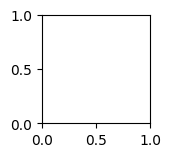

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

# Listar arquivos de imagem no diretório
arquivos = os.listdir(dir_teste)

total_imagens = len(os.listdir(dir_teste))
print("Total de imagens:", total_imagens)

# Especifique o tamanho desejado
tamanho_desejado = (224, 224)

# Carregar as imagens e armazená-las na variável samples
samples = []

# Percorrer o diretório de testes e suas subpastas
for raiz, subpastas, arquivos in os.walk(dir_teste):
    for arquivo in arquivos:
        caminho_completo = os.path.join(raiz, arquivo)
        imagem = Image.open(caminho_completo)
        imagem_redimensionada = imagem.resize(tamanho_desejado)
        samples.append(imagem_redimensionada)

gen2 = ImageDataGenerator(
    # rescale=1./255,  # normalizar
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    brightness_range = (0.5, 1.5),
    horizontal_flip = True,
    vertical_flip = False,
    fill_mode="constant"  # reflect #constant #wrap
)
# prepare iterator
it = gen2.flow_from_directory(dir_teste, target_size=tamanho_desejado, batch_size=56, shuffle=False)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image2 = batch[0].astype('uint8')
    # plot raw pixel data
    plt.imshow(image2)
# show the figure
plt.show()


Extraindo descritores de características a partir da rede pré-treinada

In [ ]:
def retirar_descritores( path ):
    dirPaths = [os.path.join(path, f) for f in os.listdir(path)]
    descritores = []
    IDs = []
    nomes = []
    for dirPath in dirPaths:
        imagePaths = [os.path.join(dirPath, f) for f in os.listdir(dirPath)]
        for imagePath in imagePaths:
            #img = load_img(imagePath,target_size=(331, 331)) #NASNetLarge
            img = load_img(imagePath,target_size=(224,224))
            x_train = img_to_array(img)
            x_train = np.expand_dims(x_train, axis=0)
            x_train = preprocess_input(x_train)
            descritor = model.predict(x_train)
            descritores.append(descritor)

            ID = imagePath[38:40]
            IDs.append(ID)
            nomes.append(imagePath[40:imagePath.find('/',40)])
            print('.', end ='')
    print('\n');
    descritores_np = np.array(descritores)
    return IDs, descritores_np, nomes

IDs_treino, descritores_treino, nomes_treino = retirar_descritores(dir_treino)
IDs_teste, descritores_teste, nomes_teste = retirar_descritores(dir_teste)

tamanho_descritor_treino = descritores_treino.shape[1]
tamanho_vetor_descritor_treino = descritores_treino.shape[0]
descritores_treino = descritores_treino.reshape(descritores_treino.shape[0], -1)

tamanho_descritor_teste = descritores_teste.shape[1]
tamanho_vetor_descritor_teste = descritores_teste.shape[0]
descritores_teste = descritores_teste.reshape(descritores_teste.shape[0], -1)

print('Conjunto de Treino\n');
print(IDs_treino);
print(nomes_treino);
print(tamanho_descritor_treino);
print(tamanho_vetor_descritor_treino);
print('Conjunto de Teste\n')
print(IDs_teste);
print(nomes_teste);
print(tamanho_descritor_teste);
print(tamanho_vetor_descritor_teste);

1/1 [==============================] - 0s 283ms/step
.

1/1 [==============================] - 0s 296ms/step
.

Conjunto de Treino

['01', '01', '01', '01', '02', '02', '02', '02', '02', '03', '03', '03', '03', '04', '04', '04', '04', '04', '05', '05', '05', '05', '06', '06', '06', '06', '07', '07', '07', '07', '08', '08', '08', '08', '09', '09', '09', '09', '10', '10', '10', '10', '10', '11', '11', '11', '11', '12', '12', '12', '12', '12', '13', '13', '13', '13', '14', '14', '14', '14', '14', '15', '15', '15', '15']
['brometo de ipratrópio', 'brometo de ipratrópio', 'brometo de ipratrópio', 'brometo de ipratrópio', 'cafalexina', 'cafalexina', 'cafalexina', 'cafalexina', 'cafalexina', 'captopril', 'captopril', 'captopril', 'captopril', 'carvedilol', 'carvedilol', 'carvedilol', 'carvedilol', 'carvedilol', 'cetoprofeno', 'cetoprofeno', 'cetoprofeno', 'cetoprofeno', 'citrato de sildenafila', 'citrato de sildenafila', 'citrato de sildenafila', 'citrato de sildenafila', 'cloridrato de m

Classificando com o KNN

In [ ]:
model = KNeighborsClassifier(n_neighbors=1)

# Train the model using the training sets
model.fit(descritores_treino,IDs_treino)

#Predicted Output
predicted= model.predict(descritores_teste)

acertos = 0
for label, pred in zip(IDs_teste, predicted):
    if (label == pred):
        acertos+=1

taxa_acuracia = acertos/tamanho_vetor_descritor_teste

# Adicionado pela aluna
# Calculate the confusion matrix
cm = confusion_matrix(IDs_teste, predicted)

# Calculate the metrics for each class
report = classification_report(IDs_teste, predicted, output_dict=True)

# Calculate the average metrics
recall = report['macro avg']['recall']
#specificity = np.mean([cm[i,i]/(np.sum(cm[:,i])-cm[i,i]) if (np.sum(cm[:,i])-cm[i,i]) != 0 else 1 for i in range(cm.shape[0])])
precision = report['macro avg']['precision']
f1_score = report['macro avg']['f1-score']

print(predicted)
print(f'Acertos: {acertos}')
print(f'Acurácia: {taxa_acuracia:.5f}')
print(f'Recall: {recall:.5f}')
#print(f'Especificidade: {specificity:.5f}')
print(f'Precisão: {precision:.5f}')
print(f'F1-score: {f1_score:.5f}')
print(cm)

['01' '14' '01' '02' '14' '02' '03' '03' '03' '04' '14' '14' '05' '05'
 '05' '06' '06' '06' '07' '14' '07' '08' '08' '08' '15' '14' '03' '10'
 '14' '10' '03' '07' '07' '07' '12' '14' '14' '13' '13' '13' '14' '14'
 '14' '15' '14' '15']
Acertos: 30
Acurácia: 0.65217
Recall: 0.66667
Precisão: 0.72650
F1-score: 0.64611
[[2 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 2 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 2 0 0 0 1 0]
 [0 0 1 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classificando com Random Forest

In [ ]:
# Cria o classificador Random Forest
model = RandomForestClassifier(n_estimators=100)

# Treina o modelo usando os conjuntos de treino
model.fit(descritores_treino, IDs_treino)

# Predicted Output
forest_predicted = model.predict(descritores_teste)

f_acertos = 0
for f_label, f_pred in zip(IDs_teste, forest_predicted):
    if (f_label == f_pred):
        f_acertos+=1

f_taxa_acuracia = f_acertos/tamanho_vetor_descritor_teste

# Adicionado pela aluna
# Calculate the confusion matrix
f_cm = confusion_matrix(IDs_teste, forest_predicted)

# Calculate the metrics for each class
f_report = classification_report(IDs_teste, forest_predicted, output_dict=True, zero_division=1)

# Calculate the average metrics
f_recall = f_report['macro avg']['recall']
f_precision = f_report['macro avg']['precision']
f_f1_score = f_report['macro avg']['f1-score']

print(forest_predicted)
print(f'Acertos: {f_acertos}')
print(f'Acurácia: {f_taxa_acuracia:.5f}')
print(f'Recall: {f_recall:.5f}')
print(f'Precisão: {f_precision:.5f}')
print(f'F1-score: {f_f1_score:.5f}')
print(f_cm)

['01' '08' '02' '01' '01' '02' '03' '11' '02' '12' '01' '02' '05' '08'
 '02' '11' '08' '02' '07' '02' '02' '08' '08' '02' '10' '10' '01' '10'
 '10' '02' '02' '01' '01' '10' '06' '06' '02' '06' '06' '02' '03' '08'
 '02' '09' '10' '02']
Acertos: 9
Acurácia: 0.19565
Recall: 0.20000
Precisão: 0.49175
F1-score: 0.17333
[[1 1 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 1 0 0 0 0]
 [0 2 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 2 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 2 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 1 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 0 0 0 0 0]]


Classificando com SVMs (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Cria o classificador SVM
model = SVC()

# Treina o modelo usando os conjuntos de treino
model.fit(descritores_treino, IDs_treino)

# Predicted Output
svm_predicted = model.predict(descritores_teste)

s_acertos = 0
for s_label, s_pred in zip(IDs_teste, svm_predicted):
    if s_label == s_pred:
        s_acertos += 1

s_taxa_acuracia = s_acertos / len(descritores_teste)

# Calculate the confusion matrix
s_cm = confusion_matrix(IDs_teste, svm_predicted)

# Calculate the metrics for each class
s_report = classification_report(IDs_teste, svm_predicted, output_dict=True, zero_division=1)

# Calculate the average metrics
s_recall = s_report["macro avg"]["recall"]
s_precision = s_report["macro avg"]["precision"]
s_f1_score = s_report["macro avg"]["f1-score"]

print(svm_predicted)
print(f"Acertos: {s_acertos}")
print(f"Acurácia: {s_taxa_acuracia:.5f}")
print(f"Recall: {s_recall:.5f}")
print(f"Precisão: {s_precision:.5f}")
print(f"F1-score: {s_f1_score:.5f}")
print(s_cm)


['10' '12' '12' '10' '12' '12' '10' '12' '12' '10' '14' '14' '06' '12'
 '02' '06' '12' '12' '10' '12' '12' '10' '12' '14' '12' '12' '13' '10'
 '12' '12' '06' '06' '12' '14' '10' '12' '12' '13' '14' '12' '10' '12'
 '14' '10' '12' '14']
Acertos: 6
Acurácia: 0.13043
Recall: 0.13333
Precisão: 0.67225
F1-score: 0.07997
[[0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 2 0]
 [0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0]]
